In [16]:
import warnings
import os
import sys


warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../..'))
sys.path.append(parent_dir)

In [17]:
import pandas as pd
from bertopic import BERTopic
from nltk.corpus import stopwords
import nltk
import os
from src.main.utilities import utils

os.environ["TOKENIZERS_PARALLELISM"] = "false" 

#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#read and clean dataset
df = pd.read_json('../../dataset/News_Category_Dataset.json', lines=True)
df = utils.clean(df)

print(len(df))

# Remove stopwords from dataset
df['short_description'] = df['short_description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))

# Extract 100000 samples of short_description and category for Bertopic
docs = df['short_description'].tolist()[:50000]
cat = df['category'].tolist()[:50000]

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, nr_topics=21)

# Fit BERTopic model and extract topics
topics, _ = topic_model.fit_transform(docs)



186045


2024-04-14 20:01:56,409 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 1563/1563 [00:40<00:00, 39.02it/s]
2024-04-14 20:02:40,216 - BERTopic - Embedding - Completed ✓
2024-04-14 20:02:40,217 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-14 20:02:52,057 - BERTopic - Dimensionality - Completed ✓
2024-04-14 20:02:52,058 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-14 20:10:27,732 - BERTopic - Cluster - Completed ✓
2024-04-14 20:10:27,742 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-14 20:10:28,292 - BERTopic - Representation - Completed ✓
2024-04-14 20:10:28,293 - BERTopic - Topic reduction - Reducing number of topics
2024-04-14 20:10:28,789 - BERTopic - Topic reduction - Reduced number of topics from 441 to 21


In [18]:
#plot founded topics
print(topic_model.get_topic_info())

    Topic  Count                                         Name  \
0      -1  25054                  -1_said_trump_one_president   
1       0   7526                    0_trump_president_us_said   
2       1   5817                          1_women_said_its_it   
3       2   2164                      2_host_show_late_singer   
4       3   1913                   3_sexual_gun_accused_court   
5       4   1692        4_coronavirus_covid19_pandemic_health   
6       5   1443                   5_christmas_time_year_love   
7       6    749                6_hurricane_storm_died_people   
8       7    575                 7_olympic_olympics_golf_gold   
9       8    510                   8_climate_change_water_epa   
10      9    472                    9_hair_wine_rainbow_deals   
11     10    414                  10_food_dish_eating_cooking   
12     11    338  11_tomdispatchcom_crossposted_facebook_uber   
13     12    326                    12_mayor_travel_city_trip   
14     13    282         

In [19]:

# Recreate dataframe for counting unique categories per topic
df = pd.DataFrame({'Document': docs, 'Category': cat, 'Topic': topics})

df = df.groupby('Topic')['Category'].nunique()



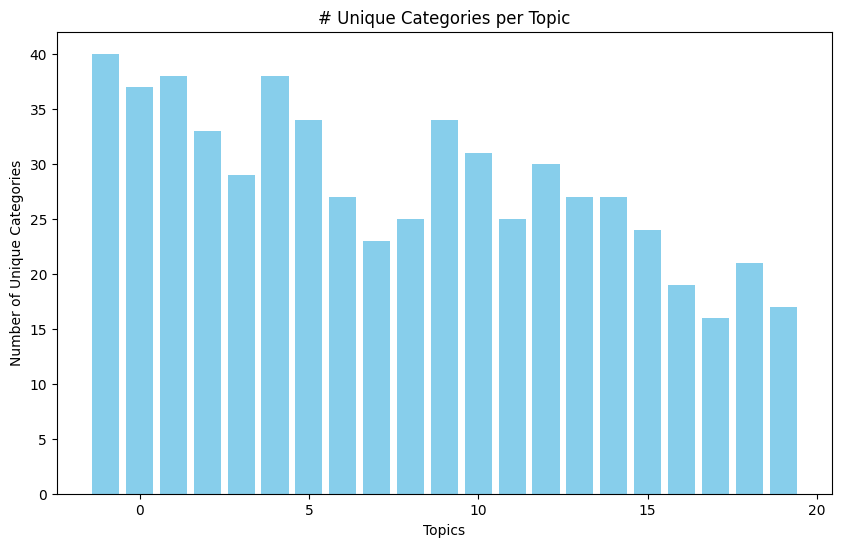

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.bar(df.index, df.values, color='skyblue')

#plt.xticks(df.index)

plt.xlabel('Topics')
plt.ylabel('Number of Unique Categories')
plt.title('# Unique Categories per Topic')

plt.show()